In [33]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

In [34]:
df_40K = np.array(pd.read_csv('40K_100X.txt', header=None)[0]) * 10**9
df_20K = np.array(pd.read_csv('20K_100X.txt', header=None)[0]) * 10**9
df_10K = np.array(pd.read_csv('10K_100X.txt', header=None)[0]) * 10**9
df_5K = np.array(pd.read_csv('5K_100X.txt', header=None)[0]) * 10**9
df_25K = np.array(pd.read_csv('2.5K_100X.txt', header=None)[0]) * 10**9

df_25K= df_25K[df_25K > 1]
df_5K= df_5K[df_5K > 2]
df_10K= df_10K[df_10K > 3]
df_20K= df_20K[df_20K > 3]
df_40K= df_40K[df_40K > 3]

data = [df_25K, df_5K, df_10K, df_20K, df_40K]
ticks = ['2.5K', '5K', '10K', '20K', '40K']

In [35]:
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def log_norm(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

Text(0.5, 102.72222222222219, 'Equivalent radius, nm')

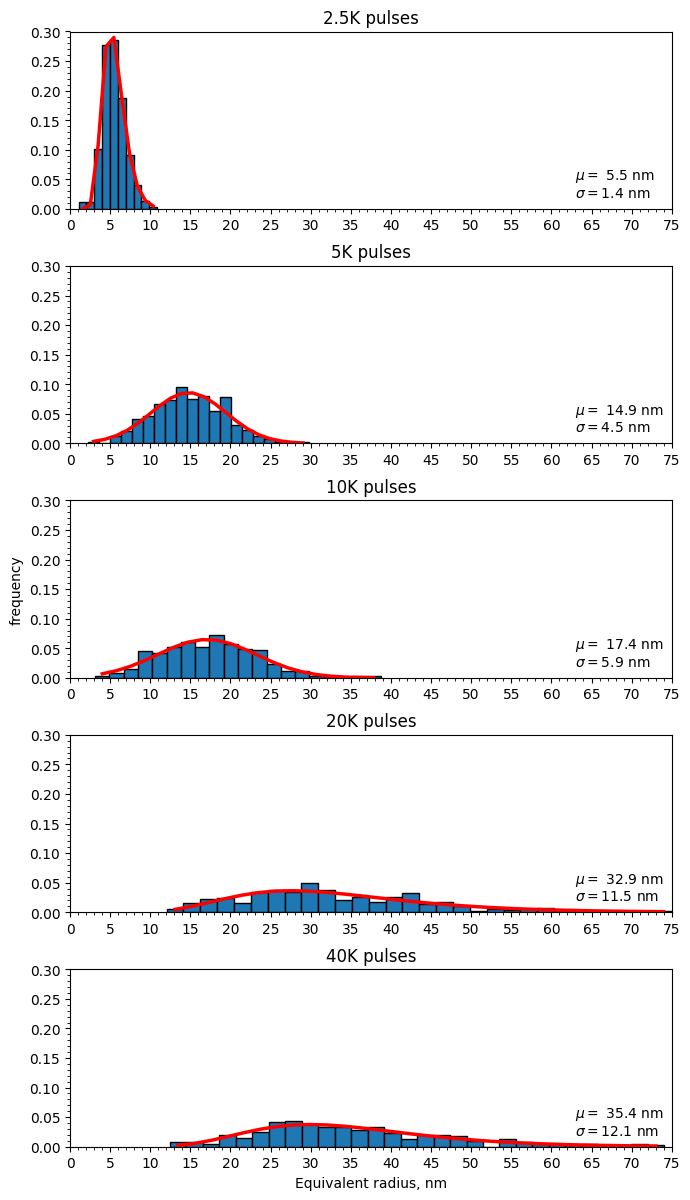

In [36]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize = [7,12])
fig.tight_layout(pad=2)

bins_coll = [10, 20 , 20, 30, 30]

for i in range(len(ax)):
    ax[i].set_xlim([0, 75])
    ax[i].set_ylim([0, 0.3])
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    ax[i].yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    ax[i].set_title(f'{ticks[i]} pulses')
    ax[i].text(63, 0.05, rf'$\mu = $ {(data[i].mean(axis=0)):,.1f} nm')
    ax[i].text(63, 0.02, r'$\sigma = $' + f'{(data[i].std(axis=0)):,.1f} nm')
    counts, bins, _ = ax[i].hist(data[i], bins=bins_coll[i], density=True, edgecolor = 'black')
    bin_centers = (bins[1:] + bins[:-1]) / 2
    if i in [0,3,4]:
        popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
        ax[i].plot(bin_centers, log_norm(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5)
    else:
        popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[0, 1])
        ax[i].plot(bin_centers, gaussian(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5) 

ax[2].set_ylabel('frequency')
ax[4].set_xlabel('Equivalent radius, nm')       

#plt.savefig('size_distr.png', bbox_inches = 'tight', dpi = 300)

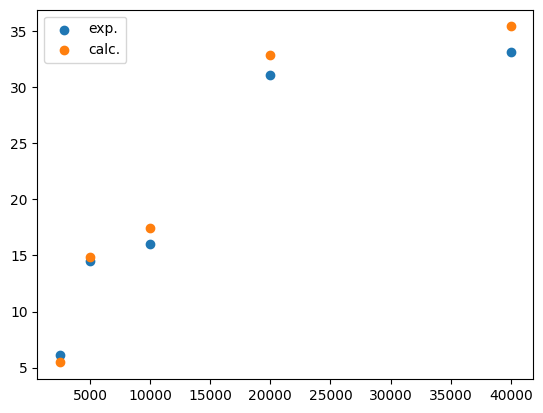

In [44]:
pulses = [2500, 5000, 10000, 20000, 40000] 
mean = [i.mean(axis = 0) for i in data]

grain_size = [6.12053282553503, 14.4675536535772, 16.0292041820779, 31.1088409009669, 33.1809412908201]



#plt.boxplot(data, labels= ticks) 
plt.scatter(pulses, grain_size, label = 'exp.')
plt.scatter(pulses, mean, label = 'calc.')
plt.legend()
